In [1]:
import pandas as pd
import segysak
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
def plot_hist_pars(el_pars, ignore_zero=False):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3), dpi=150)
    
    for (k, v), ax in zip(el_pars.items(), axs):
        data = v.data.to_numpy().flatten()
        if ignore_zero:
            data = data[data != 0]
        ax.set_title(k)
        ax.hist(data, bins=20)
        ax.set_ylim([0, 20])
    plt.show()

In [3]:
sc_path = r'.\2D_Scenarios'
scenarios = glob.glob(sc_path+'\sc*')
scenarios

['.\\2D_Scenarios\\sc_1', '.\\2D_Scenarios\\sc_2', '.\\2D_Scenarios\\sc_3']

Эту модель будут варьировать на предмет наличия талых зон, поэтому будет несколько сценариев, для каждого сценария своя моделька

Ниже датафрейм с координатами приборов. Это и приемники, и источники одновременно, т.е. всего будет 319 сейсмограмм по 319 трасс

In [4]:
df_ins = pd.read_csv(sc_path+r'\instruments.txt', sep='\t')
df_ins

,X,Surf_idx,Z
0,0.00,26,50.0
1,25.96,26,50.0
2,50.96,27,52.0
3,77.21,27,52.0
4,102.21,27,52.0
...,...,...,...
314,7999.83,34,66.0
315,8024.83,34,66.0
316,8049.83,34,66.0
317,8076.08,34,66.0


In [5]:
constraints = {"Vp": 1800, "Vs": 750, "Rho" : 1500}

В изначальных моделях есть корявые ячейки у самой поверхности, где Vp очень низкие, контраст с соседними ячейками достигает 2000+. Когда волновой процесс доходит до этих ячеек, очень часто вылезает вычислительная неустойчивость. Не хочется ради них задирать порядок аппроксимации и улучшать дискретизацию<br>
Код ниже позволяет убрать их

  0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

  0%|          | 0.00/319 [00:00<?, ? traces/s]

  0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

  0%|          | 0.00/319 [00:00<?, ? traces/s]

  0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

  0%|          | 0.00/319 [00:00<?, ? traces/s]

Loading Traces:   0%|          | 0.00/319 [00:00<?, ? traces/s]

Loading Traces:   0%|          | 0.00/319 [00:00<?, ? traces/s]

Loading Traces:   0%|          | 0.00/319 [00:00<?, ? traces/s]

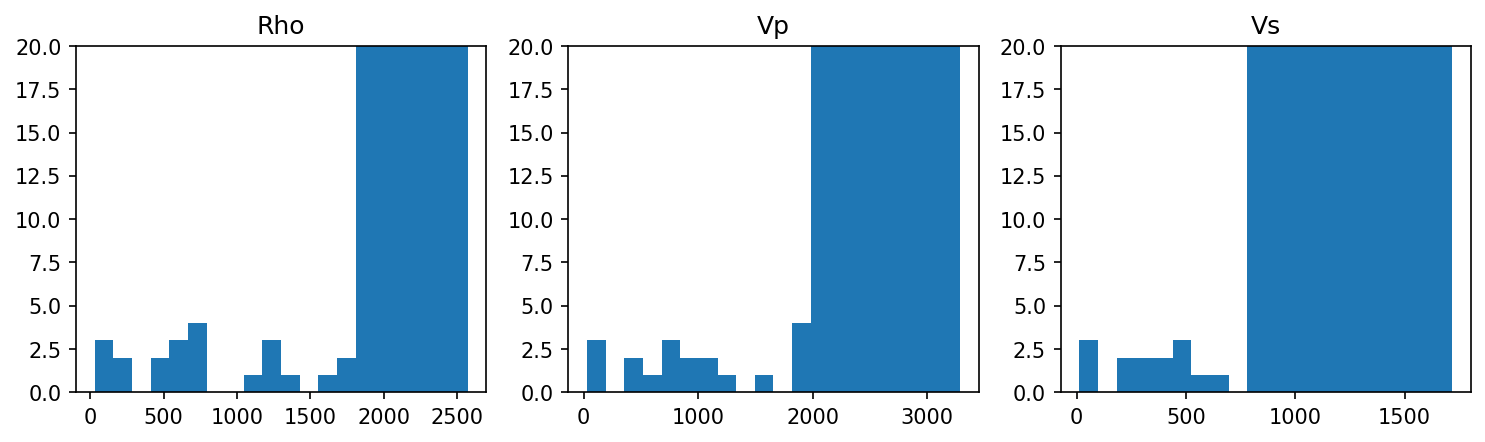

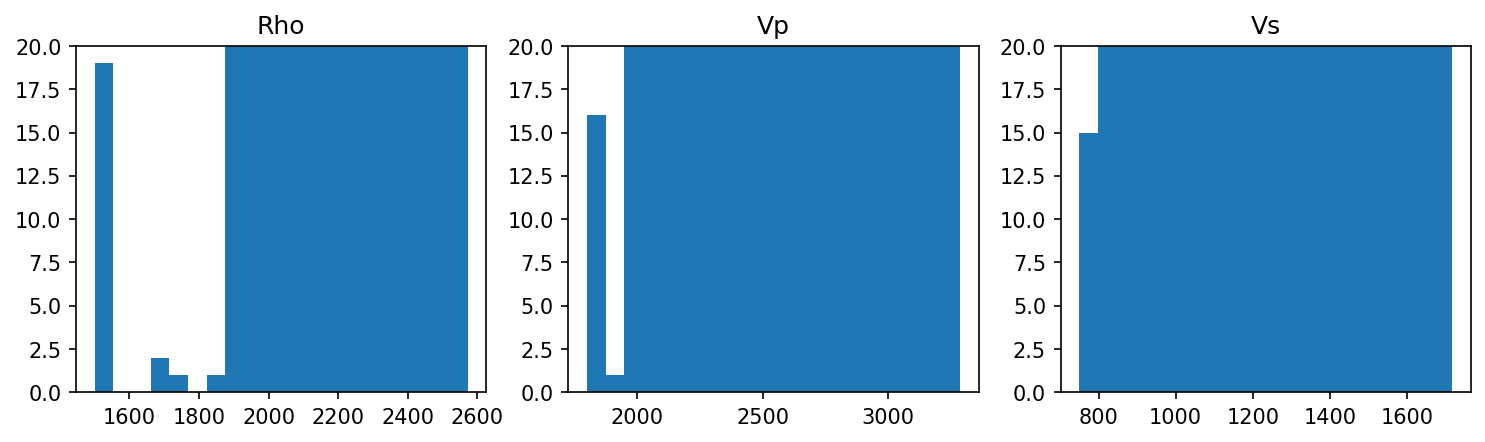

In [8]:
for i, scenario in enumerate(scenarios[:1]): #single check
# for i, scenario in enumerate(scenarios): #whole
    readsgy = lambda x : xr.open_dataset(x,
                                         dim_byte_fields={"cdp" : 21},
                                         extra_byte_fields={'cdp_x':181, 'cdp_y':185}
                                        )
    el_pars = {file.split('\\')[-1].split(' ')[0] : readsgy(file) for file in glob.glob(scenario+'\*.sgy')}
    plot_hist_pars(el_pars, ignore_zero=True) # гистограммы параметров перед корректировкой
    for k, v in el_pars.items():
        el_pars[k] = el_pars[k].where(((el_pars[k] > constraints[k]) | (el_pars[k] == 0)) | (el_pars[k].samples>100), constraints[k])
    plot_hist_pars(el_pars, ignore_zero=True)  # гистограммы параметров после корректировки

    # привычный формат
    rho_data = (el_pars["Rho"].data/1000).to_numpy()
    vp_data = (el_pars["Vp"].data/1000).to_numpy()
    vs_data = (el_pars["Vs"].data/1000).to_numpy()

    # твой код
    # for i, row in df_ins.iterrows():
    #     sou_x = row.X
    #     sou_z = row.Z
        # сетка
    
        # модель
    
        # оператор
    
        # выгрузка в sgy